Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

%matplotlib inline

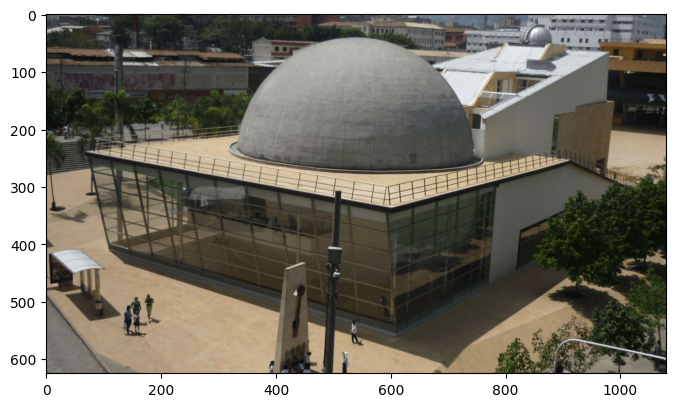

In [16]:
# 1. Carguemos y mostremos la imagen
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg')
plt.imshow(imagen)
plt.show()



In [17]:
x_ = np.array([332,335,340,348,357,369,386,409,433,456,486,514,538,569,595,622,666,689,710,725,737,744,745])
y_ = np.array([233,212,192,170,149,128,107,88,71,58,48,42,41,43,49,58,86,106,133,162,191,221,250])


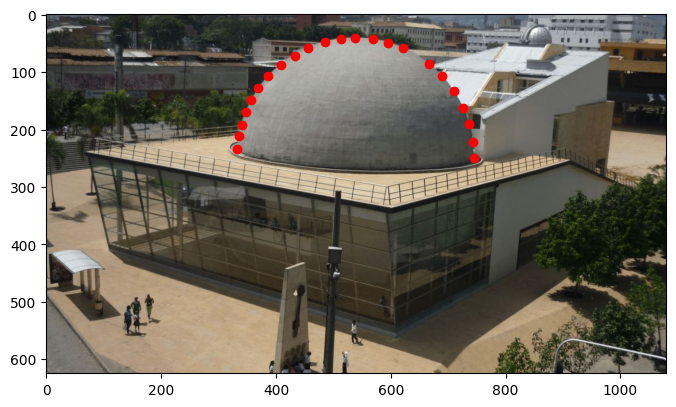

In [18]:
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg')
plt.imshow(imagen)
plt.plot(x_, y_, "ro")
plt.show()

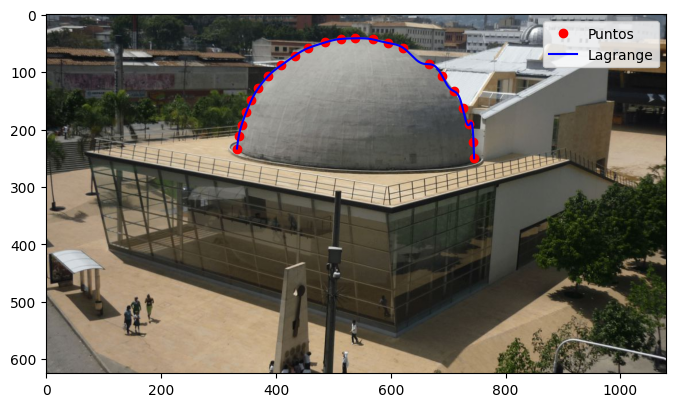

In [19]:
def Lnk(nodes, x, k):
    value = 1
    n = len(nodes)
    for i in range(n):
        if(i == k): 
            continue
        value *= (x - nodes[i])/(nodes[k]-nodes[i])
            
    return value

def Pn(x, nodes, images):
    n = len(nodes)
    values = []
    for k in range(n):
        values.append(images[k]*Lnk(nodes,x,k))
    return np.sum(values)

def Interpolacion_Lagrange(x, nodes, images):
        values = [Pn(xk, nodes,images) for xk in x]
        plt.plot(x,values, label="Lagrange", color="blue")


nodes = x_
images = y_
x = np.linspace(np.min(nodes), np.max(nodes), 1000)

plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg')
plt.imshow(imagen)
plt.plot(x_, y_, "ro", label="Puntos")
Interpolacion_Lagrange(x, nodes, images)
plt.legend()
plt.show()

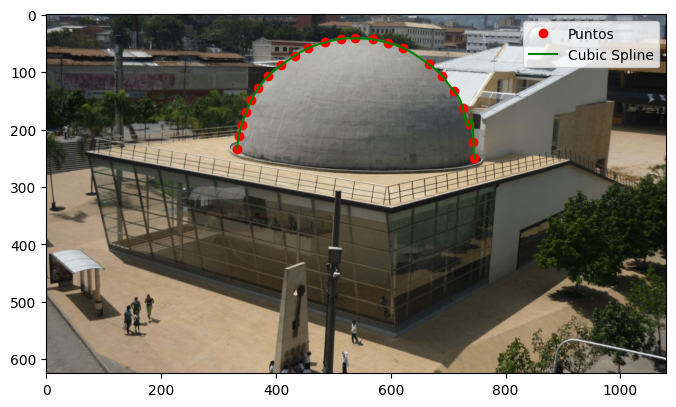

In [20]:
CubicSpline(x_, y_)
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg')
plt.imshow(imagen)
plt.plot(x_, y_, "ro", label="Puntos")
plt.plot(x, CubicSpline(x_, y_)(x), label="Cubic Spline", color="green")
plt.legend()

Note que `CubicSpline` tiende a presentar menos fluctuaciones que la interpolación polinomial de Lagrange, especialmente cuando se usan muchos puntos. Esto se debe a que los cubic splines están construidos como funciones por tramos que son, al menos, de clase $C^2$